In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_preparation as dp
import source.modelling_utils as utils
import source.models_classification as modl

import numpy as np
import pandas as pd
# Example


Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


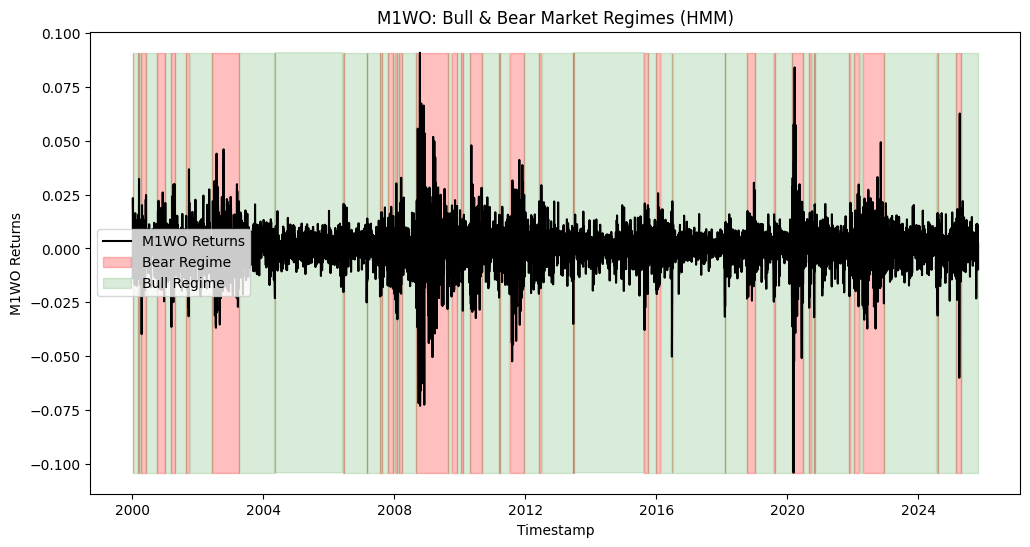

In [2]:
df = dp.create_classification_data()

In [3]:
# def downsample_to_monthly(df):
#     df = df.copy()
#     df.index = pd.to_datetime(df.timestamp)
#     # aggregate to monthly start frequency
#     df = df.sort_index().asfreq("MS")
#     return df  
# df = downsample_to_monthly(df)

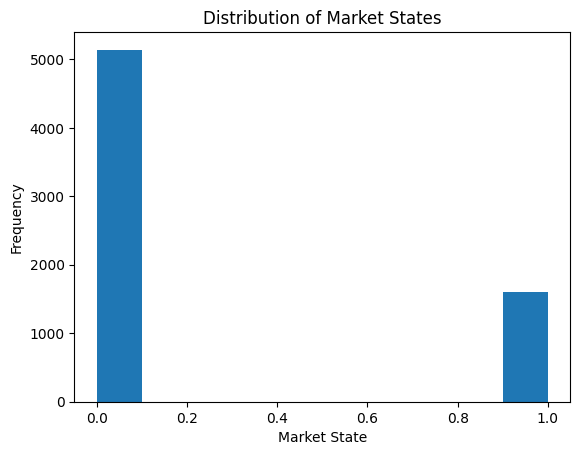

Portion of state 0: 76.28%
Portion of state 1: 23.72%


In [4]:
import matplotlib.pyplot as plt

plt.hist(df['state'])
plt.title('Distribution of Market States')
plt.xlabel('Market State')
plt.ylabel('Frequency')
plt.show()

# pretty unbalanced 
portion_state_0 = len(df[df['state'] == 0]) / len(df)
portion_state_1 = len(df[df['state'] == 1]) / len(df)
print(f"Portion of state 0: {portion_state_0:.2%}")
print(f"Portion of state 1: {portion_state_1:.2%}")

In [5]:
df.columns

Index(['timestamp', 'CL1', 'M1WO', 'SXXT', 'SPX', 'NKY', 'SPTR', 'EUR003M',
       'FEDL01', 'GC1', 'V2X', 'MOVE', 'VIX', 'USYC2Y10', 'VXJ', 'state',
       'regime'],
      dtype='object')

In [10]:
logit_lag_fit_predict = modl.make_logit_multifeature_lag_fit_predict_fn()

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    model_fit_predict_fn=logit_lag_fit_predict,
    start_oos="2020-01-01",
)

print(metrics)

2020-01-01 00:00:00
2020-01-02 00:00:00
2020-01-03 00:00:00
2020-01-06 00:00:00
2020-01-07 00:00:00
2020-01-08 00:00:00
2020-01-09 00:00:00
2020-01-10 00:00:00
2020-01-13 00:00:00
2020-01-14 00:00:00
2020-01-15 00:00:00
2020-01-16 00:00:00
2020-01-17 00:00:00
2020-01-20 00:00:00
2020-01-21 00:00:00
2020-01-22 00:00:00
2020-01-23 00:00:00
2020-01-24 00:00:00
2020-01-27 00:00:00
2020-01-28 00:00:00
2020-01-29 00:00:00
2020-01-30 00:00:00
2020-01-31 00:00:00
2020-02-03 00:00:00
2020-02-04 00:00:00
2020-02-05 00:00:00
2020-02-06 00:00:00
2020-02-07 00:00:00
2020-02-10 00:00:00
2020-02-11 00:00:00
2020-02-12 00:00:00
2020-02-13 00:00:00
2020-02-14 00:00:00
2020-02-17 00:00:00
2020-02-18 00:00:00
2020-02-19 00:00:00
2020-02-20 00:00:00
2020-02-21 00:00:00
2020-02-24 00:00:00
2020-02-25 00:00:00
2020-02-26 00:00:00
2020-02-27 00:00:00
2020-02-28 00:00:00
2020-03-02 00:00:00
2020-03-03 00:00:00
2020-03-04 00:00:00
2020-03-05 00:00:00
2020-03-06 00:00:00
2020-03-09 00:00:00
2020-03-10 00:00:00


In [7]:
from importlib import reload
reload(modl)

<module 'source.models_classification' from '/Users/kilianrunnwerth/Masterarbeit/source/models_classification.py'>

In [13]:
# acc, brier, y_t, y_prob, thr_arr, dts = modl.moment_cls_oos(
#     data=df,
#     feature_cols=["SXXT", "SPX", "NKY", "SPTR", "EUR003M",
#              "FEDL01", "GC1", "V2X", "MOVE", "VIX",
#              "USYC2Y10", "VXJ"],
#     target_col="state",   # your Bull/Bear label
#     train_first_step_only=True,
#     seq_len=8,
#     start_oos="2024-01-01",
# )
fit_fn = modl.make_moment_fit_predict_fn(
    feature_cols=["SXXT", "SPX", "NKY", "SPTR", "EUR003M", "FEDL01", "GC1", "V2X", "MOVE", "VIX", "USYC2Y10", "VXJ"],   # or a list of your channels
    target_col="state",
    seq_len=8,
    epochs=30,
    tune_threshold="youden",           # or "majority" or None
    retrain_every=1000,
    batch_size=64,
    use_class_weight=True
)

metrics, y_true, y_pred, dates = utils.expanding_oos_tabular_cls(
    data=df,
    target_col="state",
    start_oos="2020-01-01",
    start_date="1850-01-01",
    min_train=256,                     # recommend >= seq_len
    model_name="MOMENT-CLS",
    model_fit_predict_fn=fit_fn,
    baseline_mode="majority",
)


2020-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/momentfm/models/moment.py:174: UserWarning: Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.
  warnings.warn("Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.")


[MOMENT retrain] Epoch 1/30 | Avg loss = 0.706961
[MOMENT retrain] Epoch 2/30 | Avg loss = 0.691238
[MOMENT retrain] Epoch 3/30 | Avg loss = 0.681338
[MOMENT retrain] Epoch 4/30 | Avg loss = 0.678142
[MOMENT retrain] Epoch 5/30 | Avg loss = 0.672439
[MOMENT retrain] Epoch 6/30 | Avg loss = 0.668755
[MOMENT retrain] Epoch 7/30 | Avg loss = 0.666290
[MOMENT retrain] Epoch 8/30 | Avg loss = 0.665205
[MOMENT retrain] Epoch 9/30 | Avg loss = 0.660519
[MOMENT retrain] Epoch 10/30 | Avg loss = 0.657642
[MOMENT retrain] Epoch 11/30 | Avg loss = 0.659233
[MOMENT retrain] Epoch 12/30 | Avg loss = 0.662404
[MOMENT retrain] Epoch 13/30 | Avg loss = 0.655881
[MOMENT retrain] Epoch 14/30 | Avg loss = 0.655702
[MOMENT retrain] Epoch 15/30 | Avg loss = 0.658484
[MOMENT retrain] Epoch 16/30 | Avg loss = 0.655113
[MOMENT retrain] Epoch 17/30 | Avg loss = 0.655074
[MOMENT retrain] Epoch 18/30 | Avg loss = 0.650628
[MOMENT retrain] Epoch 19/30 | Avg loss = 0.651322
[MOMENT retrain] Epoch 20/30 | Avg loss 

/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/momentfm/models/moment.py:174: UserWarning: Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.
  warnings.warn("Only reconstruction head is pre-trained. Classification and forecasting heads must be fine-tuned.")


[MOMENT retrain] Epoch 1/30 | Avg loss = 0.702905
[MOMENT retrain] Epoch 2/30 | Avg loss = 0.691322
[MOMENT retrain] Epoch 3/30 | Avg loss = 0.683794
[MOMENT retrain] Epoch 4/30 | Avg loss = 0.682233
[MOMENT retrain] Epoch 5/30 | Avg loss = 0.679903
[MOMENT retrain] Epoch 6/30 | Avg loss = 0.678728
[MOMENT retrain] Epoch 7/30 | Avg loss = 0.674013
[MOMENT retrain] Epoch 8/30 | Avg loss = 0.674346
[MOMENT retrain] Epoch 9/30 | Avg loss = 0.669078
[MOMENT retrain] Epoch 10/30 | Avg loss = 0.668910
[MOMENT retrain] Epoch 11/30 | Avg loss = 0.671638
[MOMENT retrain] Epoch 12/30 | Avg loss = 0.670931
[MOMENT retrain] Epoch 13/30 | Avg loss = 0.668288
[MOMENT retrain] Epoch 14/30 | Avg loss = 0.668063
[MOMENT retrain] Epoch 15/30 | Avg loss = 0.668529
[MOMENT retrain] Epoch 16/30 | Avg loss = 0.663255
[MOMENT retrain] Epoch 17/30 | Avg loss = 0.663976
[MOMENT retrain] Epoch 18/30 | Avg loss = 0.661658
[MOMENT retrain] Epoch 19/30 | Avg loss = 0.663150
[MOMENT retrain] Epoch 20/30 | Avg loss 

In [ ]:
metrics_tabpfn, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn = modl.tabpfn_cls_oos(
    data=df,
    base_cols=["VIX", "USYC2Y10"],  # predictors you want to lag
    target_col="state",             # Bull/Bear label
    start_oos="2024-01-01",
    start_date="2000-01-05",
    n_lags=3,
    min_train=120,
    baseline_mode="majority",    # compare to majority baseline
    model_params="2.5",             # or None for V2 default
    quiet=False,
    model_name="TabPFN state classifier",
)

print(metrics_tabpfn)


RuntimeError: TabPFN not installed. Please `pip install tabpfn`.